# Telecom Churn Case Study (Machine Learning - II)

### Importing the necessary packages.

In [2]:
import jovian

In [3]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import statsmodels.api as sm

### Reading the dataset.

In [5]:
data= pd.read_csv("telecom_churn_data.csv",None)
pd.set_option('max_columns', None)
data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

### Reading the features and information of the Dataset.

In [6]:
data.shape

(99999, 226)

In [7]:
data.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [8]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
# Removing columns with 0 values in all rows, as shown in the table above:
data.drop(['mobile_number','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
           'std_ic_t2o_mou_8','std_og_t2c_mou_8','std_ic_t2o_mou_9'], axis=1, inplace=True)

In [10]:
data.circle_id.value_counts(normalize=True )

109    1.0
Name: circle_id, dtype: float64

In [11]:
# data.std_ic_t2o_mou_9.value_counts(normalize=True )

In [12]:
# data.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'], axis=1, inplace=True)

In [13]:
#there is only 1 circle id value and since its not related to churn rate, we can remove this column too
data.drop(['circle_id'], axis=1, inplace=True)

In [14]:
# data.drop(['mobile_number'], axis=1, inplace=True)

## Imputing Missing values

In [15]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

fb_night_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in data.columns if column not in date_cols + fb_night_cols]

print("Date cols:%d\nNumeric cols:%d\nfb_night cols:%d" % (len(date_cols), len(num_cols), len(fb_night_cols)))


Date cols:12
Numeric cols:196
fb_night cols:8


In [16]:
(data.isnull().sum()/len(data)*100).sort_values(ascending = False)

total_rech_data_6           74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
av_rech_amt_data_6          74.846748
count_rech_2g_6             74.846748
fb_user_6                   74.846748
count_rech_3g_6             74.846748
max_rech_data_6             74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_6                   74.846748
night_pck_user_7            74.428744
av_rech_amt_data_7          74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
total_rech_data_7           74.428744
arpu_2g_7                   74.428744
count_rech_2g_7             74.428744
date_of_last_rech_data_7    74.428744
count_rech_3g_7             74.428744
fb_user_7                   74.428744
date_of_last_rech_data_9    74.077741
total_rech_data_9           74.077741
count_rech_2g_9             74.077741
fb_user_9                   74.077741
night_pck_user_9            74.077741
count_rech_3g_9             74.077741
av_rech_amt_

## Imputing the missing recharge values with '0'

In [17]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
data[recharge_cols] = data[recharge_cols].apply(lambda x: x.fillna(0))

### Checking after imputation

In [18]:
data[recharge_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

### Replaceing the NAN values in fb_night_cols columns with '0'

In [19]:
data[fb_night_cols] = data[fb_night_cols].apply(lambda x: x.fillna(0))

In [20]:
data[fb_night_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [21]:
(data.isnull().sum()/len(data)*100).sort_values(ascending = False)

arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_7    74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
arpu_2g_9                   74.077741
count_rech_2g_9             74.077741
count_rech_3g_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
count_rech_3g_8             73.660737
date_of_last_rech_data_8    73.660737
count_rech_2g_8             73.660737
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
og_others_9                  7.745077
ic_others_9                  7.745077
std_og_t2m_mou_9             7.745077
isd_ic_mou_9                 7.745077
offnet_mou_9                 7.745077
loc_og_t2m_mou_9             7.745077
loc_og_t2f_m

In [22]:
dele_col =['arpu_2g_6','date_of_last_rech_data_6','count_rech_2g_6','arpu_3g_6','count_rech_3g_6','count_rech_3g_7',
           'date_of_last_rech_data_7','arpu_3g_7','count_rech_2g_7','arpu_2g_7','arpu_2g_9','date_of_last_rech_data_9',
           'arpu_3g_9','count_rech_3g_9','count_rech_2g_9','count_rech_3g_8','date_of_last_rech_data_8','arpu_3g_8',
           'count_rech_2g_8','arpu_2g_8']
data.drop(data[dele_col],axis=1, inplace=True)

In [23]:
imp_val = (data.isnull().sum()/len(data)*100)

In [24]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing = percent_missing[percent_missing>=1]
to_impute = percent_missing.index
sample = pd.DataFrame(percent_missing)
sample.index

Index(['last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=117)

In [25]:
data.fillna(data[to_impute].mean(), axis=0,inplace=True)

In [26]:
data[to_impute].head()

,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,8/31/2014,9/30/2014,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,8/31/2014,9/30/2014,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.56000,7.68,18.340000,11.510000,75.940000,291.86,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,2.9100,0.00,0.000000,35.390000,150.510000,299.54,72.11000,0.23000,4.110000,0.00,0.000000,0.000000,0.460000,0.13,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0,0.0,0.230000,4.580000,0.13,0.000000,0.000000,0.000000,0.0,0.000000,4.680000,23.430000,12.76,0.000000,0.000000,0.000000,0.0,0.000000,1.610000,29.91000,29.23,116.090000,17.48000,65.380000,375.58,56.930000,0.000000,8.930000,3.61,0.000000,19.090000,104.23000,408.43,173.030000,0.000000,0.000000,2.35,0.000000,5.90000,0.000000,12.49,15.010000,0.000000,0.000000,0.00,0.000000,5.900000,0.000000,14.84,15.010000,0.000000,0.000000,0.0,0.000000,1.830000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,8/31/2014,9/30/2014,11.540000,55.240000,37.26,74.810000,143.330000,220.590000,208.36,118.910000,0.000000,0.000000,0.00,38.490000,0.000000,0.000000,0.00,70.940000,7.190000,28.74000,13.58,14.390000,29.340000,16.860000,38.46,28.160000,24.110000,21.790000,15.61,22.240000

## Imputing the rest of the missing values using KNNImputer

In [27]:
data.drop(['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'], axis=1,inplace=True)

In [28]:
data.shape

(99999, 188)

In [29]:
imp_val = (data.isnull().sum()/len(data)*100)
imp_val

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

## Filtering High Value Customers

### Creating average recharge amount for June and July

In [30]:
data.shape

(99999, 188)

In [31]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

In [32]:
# add total data recharge and total recharge to get total combined recharge amount for a month
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
data['amt_data_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)


In [33]:
# calculate average recharge done by customer in June and July
data["avg_rech_amt_6_7"] = (data["amt_data_6"] + data["amt_data_7"])/2
data["avg_rech_amt_6_7"].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_rech_amt_6_7, dtype: float64

### Finding the 70th percentile

In [34]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [35]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
filtered_data = data.loc[data.avg_rech_amt_6_7 >= data.avg_rech_amt_6_7.quantile(0.7), :]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.shape


(30001, 193)

**As mentioned in the problem statement, the rows above 70th percentile are almost at range equal to 29.9K**

## Derive Churn

 Here, we are using only 9th month data to calculate the target variable (churn_rate)

In [36]:
# calculate total incoming and outgoing minutes of usage
filtered_data['total_calls_mou_9'] = filtered_data.total_ic_mou_9 + filtered_data.total_og_mou_9

In [37]:
# calculate 2g and 3g data consumption
filtered_data['total_internet_mb_9'] =  filtered_data.vol_2g_mb_9 + filtered_data.vol_3g_mb_9

In [38]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
filtered_data['churn_rate'] = filtered_data.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [39]:
# filtered_data['total_calls_mou_9'] = filtered_data.total_ic_mou_9 + filtered_data.total_og_mou_9
# filtered_data['total_internet_mb_9'] =  filtered_data.vol_2g_mb_9 + filtered_data.vol_3g_mb_9
# filtered_data['churn_rate'] = filtered_data.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
round(filtered_data['churn_rate'].value_counts(normalize=True)*100,2)

0    91.86
1     8.14
Name: churn_rate, dtype: float64

### Visualizing the dependent variable

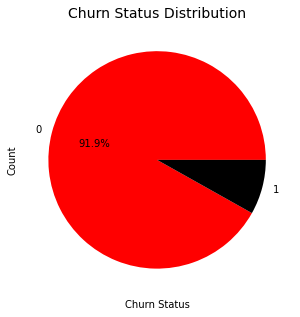

In [40]:
## Visualizing the churn rate in the form of a plot
plt.figure(figsize=(10,5))
ax=filtered_data['churn_rate'].value_counts()
plt.pie(ax,autopct='%1.1f%%',labels=ax.index,colors=['red','black'])
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=14)
plt.show()

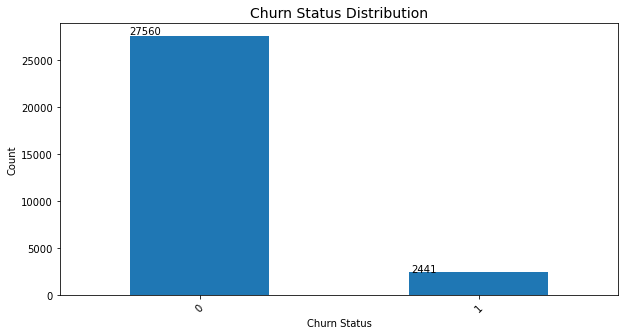

In [41]:
## Visualizing the churn rate in the form of a plot
plt.figure(figsize=(10,5))
ax=filtered_data['churn_rate'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=14)
plt.show()

In [42]:
# delete derived variables
filtered_data = filtered_data.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

# Calculate difference between 8th and previous months

In [43]:
filtered_data['arpu_diff'] = filtered_data.arpu_8 - ((filtered_data.arpu_6 + filtered_data.arpu_7)/2)

filtered_data['onnet_mou_diff'] = filtered_data.onnet_mou_8 - ((filtered_data.onnet_mou_6 + filtered_data.onnet_mou_7)/2)

filtered_data['offnet_mou_diff'] = filtered_data.offnet_mou_8 - ((filtered_data.offnet_mou_6 + filtered_data.offnet_mou_7)/2)

filtered_data['roam_ic_mou_diff'] = filtered_data.roam_ic_mou_8 - ((filtered_data.roam_ic_mou_6 + filtered_data.roam_ic_mou_7)/2)

filtered_data['roam_og_mou_diff'] = filtered_data.roam_og_mou_8 - ((filtered_data.roam_og_mou_6 + filtered_data.roam_og_mou_7)/2)

filtered_data['loc_og_mou_diff'] = filtered_data.loc_og_mou_8 - ((filtered_data.loc_og_mou_6 + filtered_data.loc_og_mou_7)/2)

filtered_data['std_og_mou_diff'] = filtered_data.std_og_mou_8 - ((filtered_data.std_og_mou_6 + filtered_data.std_og_mou_7)/2)

filtered_data['isd_og_mou_diff'] = filtered_data.isd_og_mou_8 - ((filtered_data.isd_og_mou_6 + filtered_data.isd_og_mou_7)/2)

filtered_data['spl_og_mou_diff'] = filtered_data.spl_og_mou_8 - ((filtered_data.spl_og_mou_6 + filtered_data.spl_og_mou_7)/2)

filtered_data['total_og_mou_diff'] = filtered_data.total_og_mou_8 - ((filtered_data.total_og_mou_6 + filtered_data.total_og_mou_7)/2)

filtered_data['loc_ic_mou_diff'] = filtered_data.loc_ic_mou_8 - ((filtered_data.loc_ic_mou_6 + filtered_data.loc_ic_mou_7)/2)

filtered_data['std_ic_mou_diff'] = filtered_data.std_ic_mou_8 - ((filtered_data.std_ic_mou_6 + filtered_data.std_ic_mou_7)/2)

filtered_data['isd_ic_mou_diff'] = filtered_data.isd_ic_mou_8 - ((filtered_data.isd_ic_mou_6 + filtered_data.isd_ic_mou_7)/2)

filtered_data['spl_ic_mou_diff'] = filtered_data.spl_ic_mou_8 - ((filtered_data.spl_ic_mou_6 + filtered_data.spl_ic_mou_7)/2)

filtered_data['total_ic_mou_diff'] = filtered_data.total_ic_mou_8 - ((filtered_data.total_ic_mou_6 + filtered_data.total_ic_mou_7)/2)

filtered_data['total_rech_num_diff'] = filtered_data.total_rech_num_8 - ((filtered_data.total_rech_num_6 + filtered_data.total_rech_num_7)/2)

filtered_data['total_rech_amt_diff'] = filtered_data.total_rech_amt_8 - ((filtered_data.total_rech_amt_6 + filtered_data.total_rech_amt_7)/2)

filtered_data['max_rech_amt_diff'] = filtered_data.max_rech_amt_8 - ((filtered_data.max_rech_amt_6 + filtered_data.max_rech_amt_7)/2)

filtered_data['total_rech_data_diff'] = filtered_data.total_rech_data_8 - ((filtered_data.total_rech_data_6 + filtered_data.total_rech_data_7)/2)

filtered_data['max_rech_data_diff'] = filtered_data.max_rech_data_8 - ((filtered_data.max_rech_data_6 + filtered_data.max_rech_data_7)/2)

filtered_data['av_rech_amt_data_diff'] = filtered_data.av_rech_amt_data_8 - ((filtered_data.av_rech_amt_data_6 + filtered_data.av_rech_amt_data_7)/2)

filtered_data['vol_2g_mb_diff'] = filtered_data.vol_2g_mb_8 - ((filtered_data.vol_2g_mb_6 + filtered_data.vol_2g_mb_7)/2)

filtered_data['vol_3g_mb_diff'] = filtered_data.vol_3g_mb_8 - ((filtered_data.vol_3g_mb_6 + filtered_data.vol_3g_mb_7)/2)


In [44]:
#filtered_data['']

In [45]:
filtered_data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,avg_rech_amt_6_7,churn_rate,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

# Deleting the 9th Month variable from the dataset

In [46]:
filtered_data = filtered_data.filter(regex="[^9]$",axis=1)
filtered_data.shape


(30001, 171)

In [47]:
# extract all names that end with 9
col_9_names = data.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
fb_night_cols = [col for col in fb_night_cols if col not in col_9_names]
fb_night_cols.append('churn')
num_cols = [col for col in filtered_data.columns if col not in fb_night_cols]

In [48]:
filtered_data.shape

(30001, 171)

In [49]:
filtered_data_pca = filtered_data.copy()

In [50]:
filtered_data_pca.shape

(30001, 171)

# Visualizing the Data 

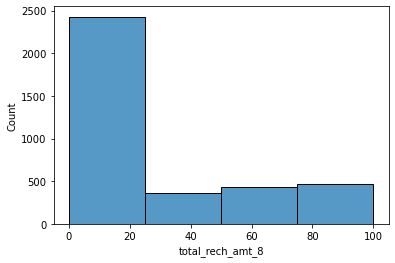

In [51]:
#fig, ax = plt.subplots(figsize =(10, 7))
sns.histplot(filtered_data['total_rech_amt_8'], bins = [0, 25, 50, 75, 100])
plt.show()

### From the plot above we can conclude that Higher the recharge amount , lower the people interested to invest in the plan.

In [52]:
# visualizing box plots for  6th, 7th and 8th month
def box_plot_func(param):
    plt.figure(figsize=(20,16))
    df = filtered_data
    plt.title("Churn Rate For ", )
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=param+"_6",x="churn_rate",hue="churn_rate",
                showfliers=False,palette=['g','r'],linewidth=2.5)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=param+"_7",x="churn_rate",hue="churn_rate",
                showfliers=False,palette=("Set2"),linewidth=2.5)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=param+"_8",x="churn_rate",hue="churn_rate",
                showfliers=False,palette=("Paired"),linewidth=2.5)
    plt.show()

### Average Revenue Per User for Good and Action Phases

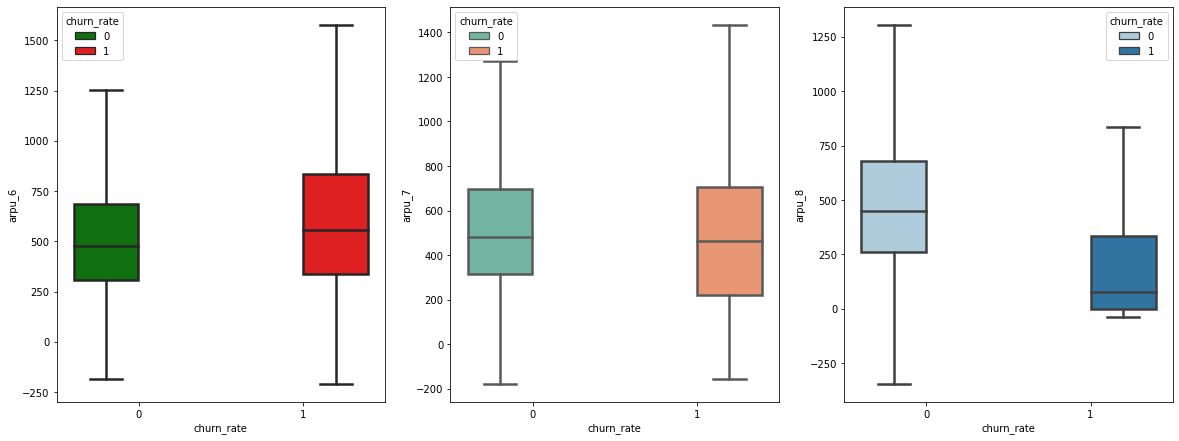

In [53]:
box_plot_func("arpu")

*** There is a slight dip in the churn rate in the month of August i.e. Action Phase ***

### All kind of calls within the same operator network.

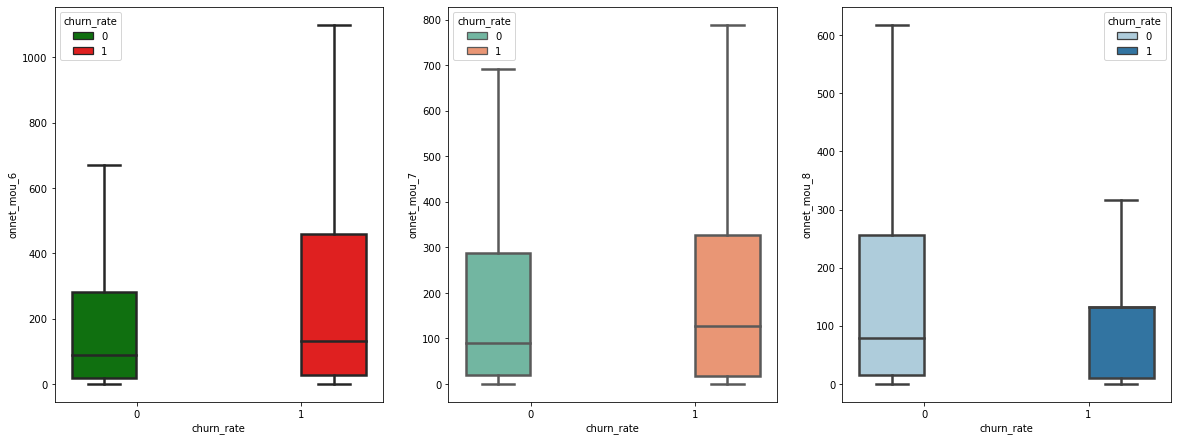

In [54]:
box_plot_func('onnet_mou')

### There is a dip in the data for Churning customers whereas for Non-churning customers it has increased.

### Local Outgoing minutes of call of Operator T to fixed lines of T


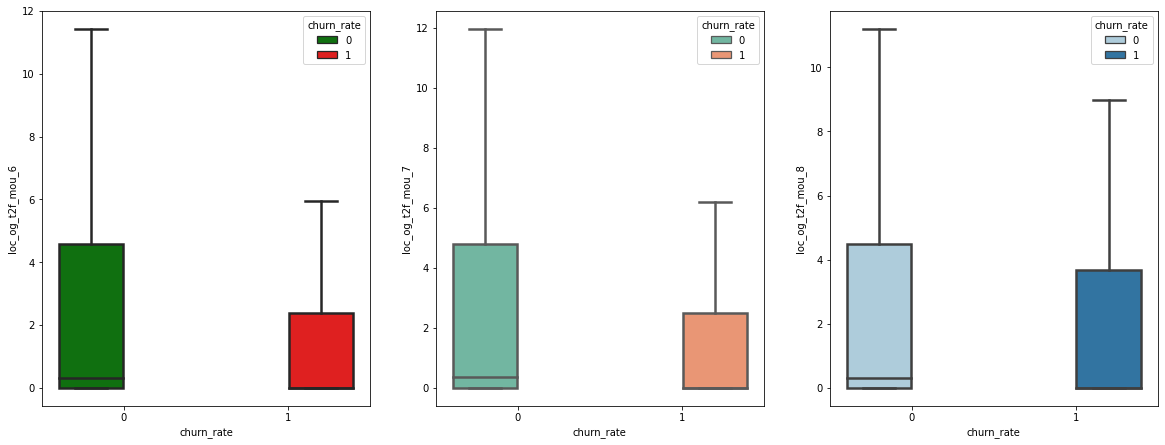

In [55]:
box_plot_func('loc_og_t2f_mou')

So we observe that Churn Rate has risen in month 8 ,for this feature

### STD outgoing call minutes for Operator T to other operator mobile

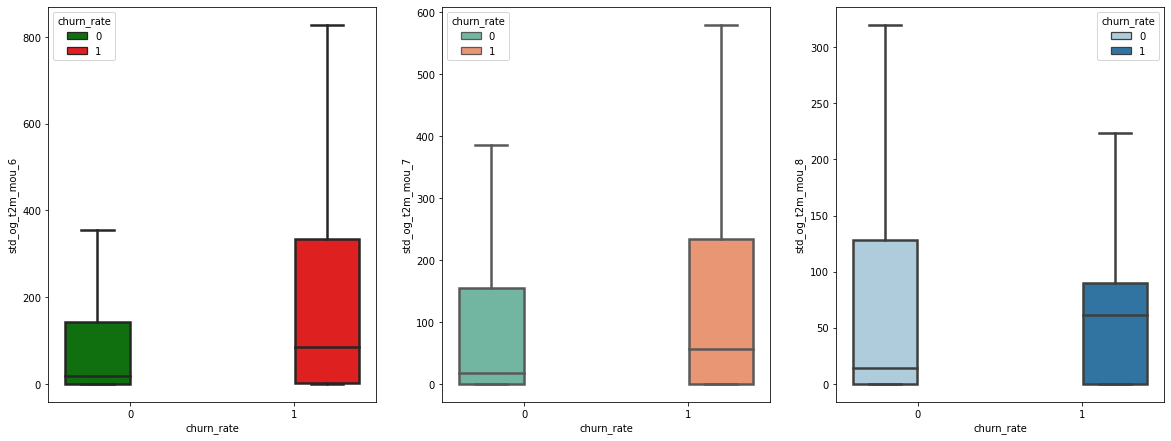

In [56]:
box_plot_func('std_og_t2m_mou')

*** Churn Rate has dropped significantly in the 8th month with this feature. ***

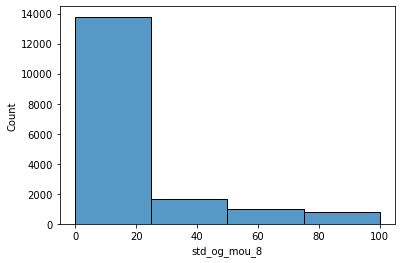

In [57]:
sns.histplot(filtered_data['std_og_mou_8'], bins = [0, 25, 50, 75, 100])
plt.show()

## Plotting Total Recharge Amount 

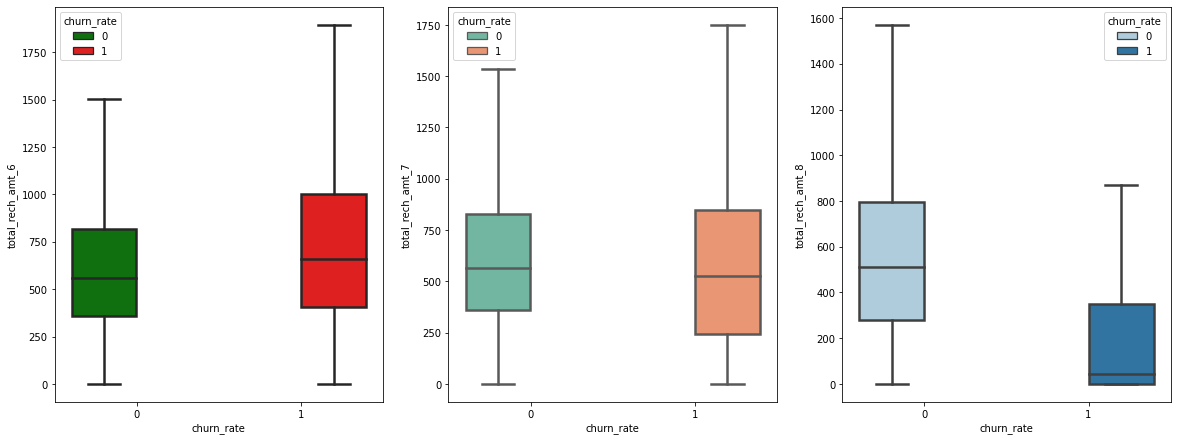

In [58]:
box_plot_func('total_rech_amt')

*** Conclusion: We can see there is significant dip in the total recharge Amount in the 8th month for churn customers. ***

### Plotting Last Day Recharge Amount Vs Churn Rate

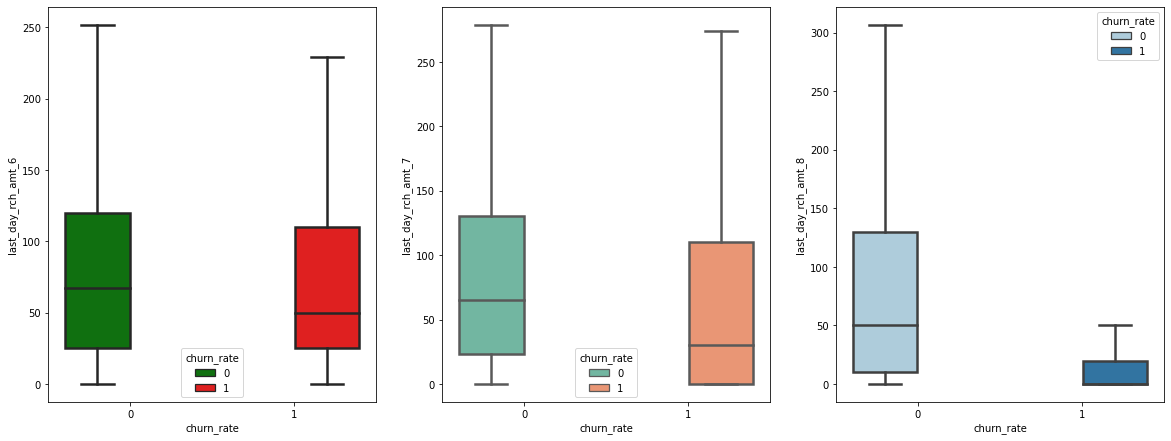

In [59]:
box_plot_func('last_day_rch_amt')

*** Analysis: There is a huge drop in the recharge amount for churned customers in the 8th month. ***

### Plotting Maximum Recharge against Churn Rate

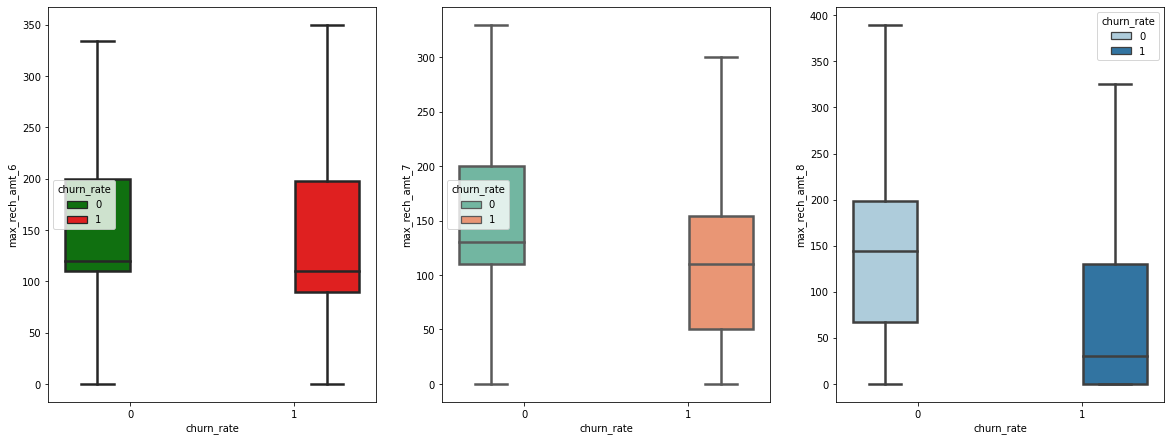

In [60]:
box_plot_func('max_rech_amt')

*** Analysis: There is a drop in the recharge amount for churned customers in the 8th month. ***

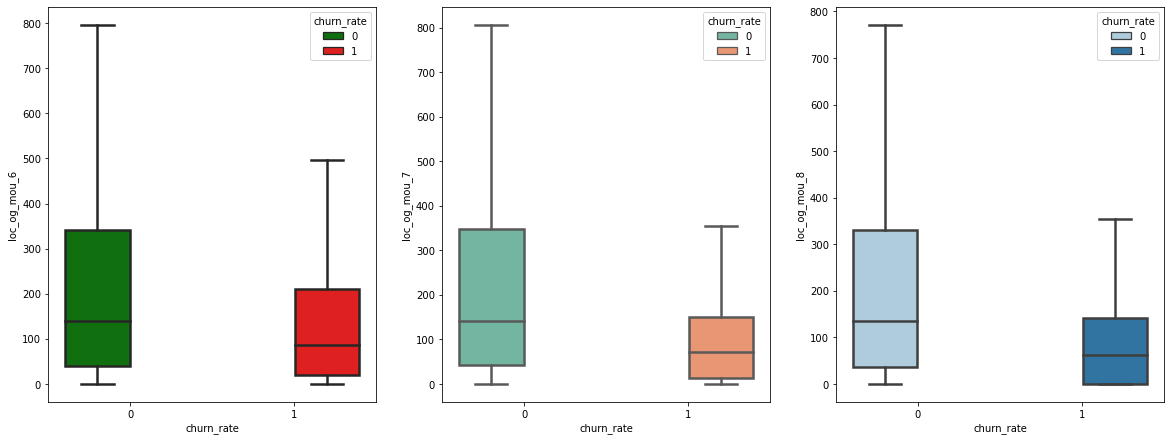

In [61]:
box_plot_func('loc_og_mou') # local outgoing calls in months

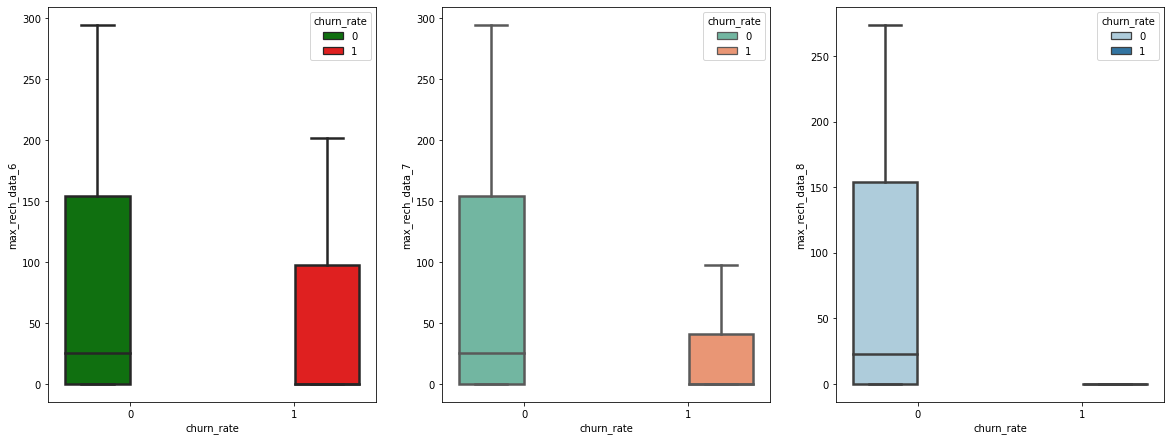

In [62]:
box_plot_func('max_rech_data') #max mobile data recharge

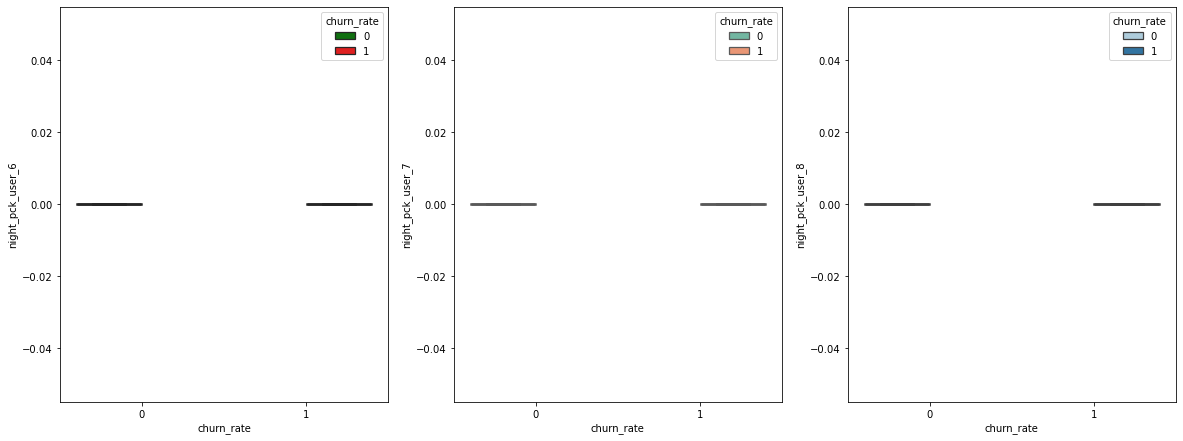

In [63]:
box_plot_func('night_pck_user')

In [64]:
# fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(25, 65))

# for i, ax in enumerate(fig.axes):
#     if i < len(num_cols):
#         ax.hist(filtered_data.loc[filtered_data['churn_rate']==0, num_cols[i]],color='black')
#         ax.hist(filtered_data.loc[filtered_data['churn_rate']==1, num_cols[i]],color='red')
#         # adjusting font size of X-Labels and Y-Labels
#         ax.set_xlabel(num_cols[i],fontsize=12)
#         ax.legend(['Not Churn','Churn'],loc = 'best')        
# plt.show()


### Dropping 6th and 7th month columns , because we have derived new features from them.

In [65]:
to_drop = filtered_data.filter(regex='_6|_7').columns
len(to_drop)

97

In [66]:
# converting Age on Number from days to months and hence dropping the previous column
filtered_data['aon_in_months'] = filtered_data['aon']/30
filtered_data['aon_in_months'].head()


0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: aon_in_months, dtype: float64

In [67]:
# Dropping the aon columns since we are having aon_in_months
filtered_data.drop('aon',axis=1, inplace=True)

In [68]:
# Dropping the columns in 'to_drop' from 'filtered_data'
filtered_data.drop(to_drop, axis=1, inplace=True)

In [69]:
filtered_data.shape

(30001, 74)

In [70]:
# we are initializing the independent features into X and target variable into y before splitting
X = filtered_data.drop("churn_rate", axis=1)
y = filtered_data["churn_rate"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, train_size=0.7, random_state =42)
print("X train Shape: ", X_train.shape, "\nX test shape: ",X_test.shape, "\ny_train Shape: ",y_train.shape, "\ny_test shape: ",y_test.shape)

X train Shape:  (21000, 73) 
X test shape:  (9001, 73) 
y_train Shape:  (21000,) 
y_test shape:  (9001,)


In [72]:
X = filtered_data_pca.drop("churn_rate", axis=1)
y = filtered_data_pca["churn_rate"]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, test_size = 0.3, train_size=0.7, random_state =42)
print("X train Shape: ", X_train.shape, "\nX test shape: ",X_test.shape, "\ny_train Shape: ",y_train.shape, "\ny_test shape: ",y_test.shape)

X train Shape:  (21000, 73) 
X test shape:  (9001, 73) 
y_train Shape:  (21000,) 
y_test shape:  (9001,)


In [73]:
X_train_cols = X_train.columns

In [74]:
# box_plot_func('offnet_mou') ///////////////////////////////////delete

In [75]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_in_months
19386,0.000,133.018098,196.574803,7.292981,9.97189,45.887806,91.755128,3.677991,1.433821,141.328209,83.282673,89.83839,1.067792,174.191498,0.791247,5.053769,0.033372,0.00,47.211362,108.460515,11.751834,167.432575,9.883921,21.183211,2.085004,33.154735,0.00,0.040361,8.442001,0.9708,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,924.05,710.02,0.0,-590.7080,75.458098,183.499803,7.292981,9.97189,78.853209,166.031498,0.791247,5.053769,-70.64,113.287575,13.809735,8.442001,0.040361,-73.490,-3.0,-527.5,-327.5,-1.5,-455.0,-581.0,-20.165,-2154.35,35.433333
20010,416.021,191.590000,267.590000,76.530000,191.29000,35.930000,76.540000,0.000000,0.000000,112.480000,62.240000,93.16000,0.000000,155.410000,0.000000,0.000000,0.000000,267.89,23.790000,163.410000,0.850000,188.060000,13.740000,3.300000,0.000000,17.040000,206.11,0.000000,0.000000,1.0000,15,464,128,20,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,-72.5930,6.590000,-495.485000,48.390000,102.92000,-24.855000,-566.960000,0.000000,0.000000,-591.82,12.175000,-26.770000,0.000000,-0.155000,-14.235,4.0,-128.0,8.0,0.0,0.0,0.0,0.000,0.00,15.300000
10917,280.326,109.690000,175.460000,0.000000,0.00000,109.690000,132.440000,27.310000,0.460000,269.460000,0.000000,14.28000,0.000000,14.280000,0.000000,1.410000,0.000000,285.16,23.140000,51.210000,2.110000,76.480000,3.040000,8.460000,0.430000,11.940000,98.23,0.000000,9.790000,0.0000,11,290,130,0,6.0,23.0,138.0,0.0,0.0,0.0,0,6,0,0,0.0,0.0,0.00,0.00,0.0,-47.8730,-5.670000,-11.575000,0.000000,0.00000,-1.490000,-15.205000,0.000000,-0.545000,-17.24,10.230000,2.570000,-14.105000,0.000000,-1.295,-0.5,-123.5,10.0,3.0,0.0,69.0,0.000,0.00,107.300000
27235,631.080,85.530000,1432.540000,0.000000,0.00000,4.010000,14.510000,0.000000,0.000000,18.530000,81.510000,1408.74000,0.000000,1490.260000,0.000000,13.290000,0.000000,1522.09,7.180000,11.090000,0.000000,18.280000,0.140000,2.180000,0.000000,2.330000,29.39,0.000000,8.780000,0.0000,14,734,144,144,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,-13.4960,-137.230000,350.600000,0.000000,0.00000,-59.165000,291.800000,0.000000,-17.720000,214.91,-52.695000,-52.485000,3.690000,0.000000,-105.425,3.0,-35.0,7.0,-0.5,-77.0,-77.0,-503.465,0.00,15.533333
15171,169.704,0.000000,33.390000,0.000000,0.00000,0.000000,8.610000,0.000000,4.580000,8.610000,0.000000,0.00000,0.000000,0.000000,0.700000,37.760000,0.000000,47.08,8.060000,100.040000,0.880000,108.990000,0.000000,0.000000,0.000000,0.000000,147.38,0.000000,38.260000,0.1100,13,195,30,30,9.0,25.0,225.0,448.8,0.0,0.0,0,9,0,0,1.0,0.0,0.00,0.00,0.0,-36.6105,-1.605000,-6.770000,0.000000,0.00000,-17.000000,-4.005000,-6.155000,28.715000,0.64,19.275000,0.000000,7.640000,-0.225000,26.810,1.5,-30.0,-10.0,3.0,0.0,75.0,48.595,0.00,7.633333


In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train= scalar.fit_transform(X_train)
X_train

array([[-9.68891168e-01, -2.34367031e-01, -3.06115955e-01, ...,
        -2.29552074e-03, -3.38899382e+00, -1.54751443e-01],
       [-1.80659560e-01, -1.05230153e-01, -1.59632698e-01, ...,
         7.68974145e-02,  8.00475975e-03, -7.85536241e-01],
       [-4.37759774e-01, -2.85799845e-01, -3.49669521e-01, ...,
         7.68974145e-02,  8.00475975e-03,  2.09685787e+00],
       ...,
       [-4.76578745e-02,  1.36080626e-01,  2.71863087e-02, ...,
         7.68974145e-02,  8.00475975e-03,  1.29062299e+00],
       [ 4.32117896e-01, -3.64416990e-02,  3.88943152e-01, ...,
         7.68974145e-02,  8.00475975e-03, -9.22345527e-01],
       [ 7.44581006e-01, -3.26008896e-03,  3.32878886e-01, ...,
         7.68974145e-02,  8.00475975e-03,  1.00656097e+00]])

In [77]:
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler()
X_test= scalar1.fit_transform(X_test)
X_test

array([[ 0.89741469, -0.39911414, -0.07003148, ...,  0.01298277,
         2.68823089,  2.12315871],
       [-1.15248775, -0.22944071, -0.30501775, ..., -0.98396235,
        -0.42105953, -1.06389002],
       [-1.12746997, -0.51655664, -0.69984673, ..., -3.23038814,
         0.01205989,  0.07918838],
       ...,
       [ 0.63912095,  2.28803317, -0.32325951, ...,  0.07950743,
         0.01205989,  1.17007142],
       [-0.40094193, -0.51655664, -0.69223411, ...,  0.03621727,
        -1.26992215,  0.4873561 ],
       [ 0.98942506, -0.12146981, -0.09328028, ...,  0.23353715,
         0.89599858,  1.37467724]])

In [78]:
print(type(X_train))

<class 'numpy.ndarray'>


In [79]:
# Converting the numpy array into Dataframe
X_train = pd.DataFrame(X_train, columns=X_train_cols)
X_test = pd.DataFrame(X_test, columns=X_train_cols)

In [80]:
# X_train['offnet_mou_8'].sort_values(ascending=False)

In [81]:
# # plot feature correlation
# import seaborn as sns
# plt.rcParams["figure.figsize"] =(10,10)
# htmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
# sns.heatmap(data=X_train.corr(), center=0.0,cmap=htmap)
# plt.show()

In [82]:
# plt.figure(figsize = (40,20))        # Size of the figure
# sns.heatmap(data = X_train.corr(),annot = True,annot_kws={'size':6})
# plt.show()

In [83]:
## Removing highly correlated values in train
X_train.drop(['arpu_8','sachet_2g_8','av_rech_amt_data_8','loc_ic_mou_8',
              'total_rech_num_8','jun_vbc_3g', 'arpu_diff', 'loc_ic_t2m_mou_8',
              'total_ic_mou_diff', 'std_og_mou_diff','onnet_mou_8','offnet_mou_8', 
              'offnet_mou_diff','total_og_mou_diff','fb_user_8','std_og_mou_8',
              'loc_og_mou_8','std_ic_mou_8'],axis=1, inplace=True)

In [84]:
## Removing highly correlated values in test
X_test.drop(['arpu_8','sachet_2g_8','av_rech_amt_data_8','loc_ic_mou_8',
              'total_rech_num_8','jun_vbc_3g', 'arpu_diff', 'loc_ic_t2m_mou_8',
              'total_ic_mou_diff', 'std_og_mou_diff','onnet_mou_8','offnet_mou_8', 
              'offnet_mou_diff','total_og_mou_diff','fb_user_8','std_og_mou_8',
              'loc_og_mou_8','std_ic_mou_8'],axis=1, inplace=True)

In [85]:
# plt.figure(figsize = (40,20))        # Size of the figure
# sns.heatmap(data = X_train.corr(),annot = True,annot_kws={'size':6})
# plt.show()

In [86]:
X_train.shape

(21000, 55)

In [87]:
def evaluation_table(y_act, y_pred):
    accuracy  = round(metrics.accuracy_score(y_act, y_pred),2)
    precision = round(precision_score(y_act, y_pred),2)
    recall = round(recall_score(y_act, y_pred),2)
    f1 = round(f1_score(y_act, y_pred),2)
    tn, fp, fn, tp = confusion_matrix(y_act, y_pred).ravel() # confusion matrix
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    model_roc_auc = round(roc_auc_score(y_test,y_test_pred),2)
   
    return (accuracy,precision,recall,f1,specificity,sensitivity, model_roc_auc)

## Logistic regression Without PCA

### With class imbalance

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [89]:
# rfe = RFE(lr,10)
# rfe = rfe.fit(X_train,y_train)
# col = X_train.columns[rfe.support_]
# col

In [90]:
lr_model = lr.fit(X_train,y_train)

In [91]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [92]:
table = pd.DataFrame()

In [93]:
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix,precision_score, f1_score,classification_report





accuracy,precision,recall,f1,specificity,sensitivity, model_roc_auc = evaluation_table(y_test,y_test_pred)
tempTable = pd.DataFrame({'Model':['Logistic regression Without PCA With class imbalance'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'Sensitivity': [sensitivity],
                            'Specificity': [specificity],
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

table = pd.concat([table, tempTable])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68


In [94]:
print("Train Evaluation with imbalanced data:\n\n ",classification_report(y_train,y_train_pred ))
print("Train accuracy value:",metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy value:",metrics.accuracy_score(y_test, y_test_pred))
print("Test Evaluation with imbalanced data:\n\n ",classification_report(y_test,y_test_pred ))

Train Evaluation with imbalanced data:

                precision    recall  f1-score   support

           0       0.95      0.99      0.97     19260
           1       0.74      0.37      0.49      1740

    accuracy                           0.94     21000
   macro avg       0.84      0.68      0.73     21000
weighted avg       0.93      0.94      0.93     21000

Train accuracy value: 0.9366666666666666
Test accuracy value: 0.9403399622264192
Test Evaluation with imbalanced data:

                precision    recall  f1-score   support

           0       0.95      0.99      0.97      8300
           1       0.73      0.37      0.49       701

    accuracy                           0.94      9001
   macro avg       0.84      0.68      0.73      9001
weighted avg       0.93      0.94      0.93      9001



In [95]:
y_train = pd.DataFrame(y_train)
y_train.value_counts()/21000

churn_rate
0             0.917143
1             0.082857
dtype: float64

*** Here we can see that the churn_rate is imbalanced.
To balance the data, we are using **SMOTE** ***

## Logistic Regression with balanced data using SMOTE

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [97]:
lr1 = LogisticRegression()
lr_model1 = lr1.fit(X_smote, y_smote)
print(classification_report(y_smote, lr_model1.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19260
           1       0.85      0.86      0.85     19260

    accuracy                           0.85     38520
   macro avg       0.85      0.85      0.85     38520
weighted avg       0.85      0.85      0.85     38520



In [98]:
y_smote.value_counts()

churn_rate
1             19260
0             19260
dtype: int64

#### Hence we can see that data is balanced from churn rate values above.

In [99]:
smote_test = SMOTE(random_state=0)
X_smote_test, y_smote_test = smote_test.fit_resample(X_test,y_test)
lr2 = LogisticRegression()
lr_model2 = lr2.fit(X_smote_test, y_smote_test)
print(classification_report(y_smote_test, lr_model2.predict(X_smote_test)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      8300
           1       0.85      0.87      0.86      8300

    accuracy                           0.86     16600
   macro avg       0.86      0.86      0.86     16600
weighted avg       0.86      0.86      0.86     16600



### From the values shown above we observe 86% accuracy for Test Data and 85% accuracy for Train Data. 
### They are almost equal to each other.

In [100]:
# Important co-eff from the interpretable models
#total_og_mou_8,std_og_t2t_mou_8, std_og_t2m_mou_8, loc_og_t2t_mou_8, loc_og_t2m_mou_8

In [101]:
y_train = pd.DataFrame(y_train,columns=['churn_rate'])

In [102]:
y_train.value_counts()/21000

churn_rate
0             0.917143
1             0.082857
dtype: float64

In [103]:
y_train.shape,X_train.shape

((21000, 1), (21000, 55))

In [104]:
# predict churn on test data
y_pred_load = lr.predict(X_smote_test)

# create onfusion matrix
cm_load = confusion_matrix(y_smote_test, y_pred_load)
print(cm_load)
TP = cm_load[1,1] # true positive 

TN = cm_load[0,0] # true negatives
FP = cm_load[0,1] # false positives
FN = cm_load[1,0] # false negatives
#Sensitivity
LR_Smote_Sensitivity= TP / float(TP+FN)
LR_Smote_Specificity = TN / float(TN+FP)
LR_Smote_Accuracy = metrics.accuracy_score(y_smote_test, y_pred_load)
print('Sensitivity:' ,TP / float(TP+FN))
print('Specificity:' ,TN / float(TN+FP))
print("Accuracy :",metrics.accuracy_score(y_smote_test, y_pred_load))



[[8204   96]
 [5222 3078]]
Sensitivity: 0.3708433734939759
Specificity: 0.9884337349397591
Accuracy : 0.6796385542168675


Here we can see that the churn_rate is imbalanced.
To balance the data, we are using **SMOTE**

In [105]:
## Creating new row for this model in table.
y_pred_load = lr.predict(X_smote_test)
accuracy2,precision2,recall2,f1_2,specificity2,sensitivity2, model_roc_auc2 = evaluation_table(y_smote_test, y_pred_load)
tempTable2 = pd.DataFrame({'Model':['Logistic Regression with balanced data using SMOTE'], 
                            'Accuracy': [accuracy2],
                            'Precision': [precision2],
                            'Recall': [recall2], 
                            'Sensitivity': [sensitivity2],
                            'Specificity': [specificity2],
                            'F1 score': [f1_2], 
                            'Area under ROC curve': [model_roc_auc2] })

table = pd.concat([table, tempTable2])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68
0,Logistic Regression with balanced data using S...,0.68,0.97,0.37,0.370843,0.988434,0.54,0.68


## High Performance Model

### Logistic regression using PCA

In [106]:
filtered_data_pca.shape

(30001, 171)

In [107]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [108]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(filtered_data_pca)
churn_pca = pca.fit_transform(filtered_data_pca)

In [109]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explained variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.16
1       16.82
2       22.55
3       27.02
4       31.16
5       34.62
6       37.48
7       39.95
8       42.39
9       44.54
10      46.56
11      48.50
12      50.32
13      52.04
14      53.72
15      55.36
16      56.92
17      58.35
18      59.75
19      61.11
20      62.43
21      63.70
22      64.93
23      66.11
24      67.28
25      68.39
26      69.46
27      70.48
28      71.48
29      72.43
30      73.37
31      74.30
32      75.19
33      76.06
34      76.90
35      77.72
36      78.53
37      79.29
38      80.03
39      80.74
40      81.44
41      82.12
42      82.80
43      83.47
44      84.08
45      84.66
46      85.22
47      85.76
48      86.28
49      86.78
50      87.26
51      87.72
52      88.18
53      88.61
54      89.03
55      89.43
56      89.81
57      90.19
58      90.57
59      90.92
60      91.28
61      91.61
62      91.92
63      92.22
64      92.51
65      92.79
66      93.07
67      93.33
68      93.59
69      93.84
70      94.09
71    

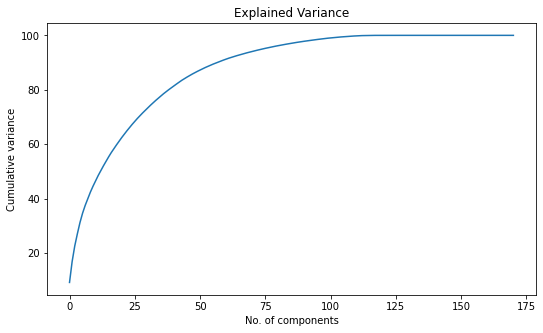

In [110]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.title("Explained Variance")
plt.xlabel("No. of components")
plt.ylabel("Cumulative variance")
plt.plot(cumulative_variance)
plt.show()

## PCA with Logistic regression

In [111]:
# creating pipeline
PCA_VARS = 95
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [112]:
# fit model
pipeline.fit(X_train_pca, y_train_pca)

# check score on train data
pipeline.score(X_train_pca, y_train_pca)

0.8055238095238095

### Evaluation on test

In [113]:
# predict churn on test data

y_pred = pipeline.predict(X_test_pca)

# create onfusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pca, y_pred)
print(cm)

# check sensitivity and specificity
from sklearn.metrics import roc_auc_score
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
#Sensitivity
print('Sensitivity:' ,TP / float(TP+FN))
print('Specificity:' ,TN / float(TN+FP))
print("Accuracy :",metrics.accuracy_score(y_test_pca, y_pred))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_pca, y_pred),2))

[[6674 1626]
 [ 125  576]]
Sensitivity: 0.8216833095577746
Specificity: 0.8040963855421687
Accuracy : 0.8054660593267414
AUC:    	 0.81


In [114]:
accuracy3,precision3,recall3,f1_3,specificity3,sensitivity3, model_roc_auc3 = evaluation_table(y_test_pca, y_pred)
tempTable3 = pd.DataFrame({'Model':['Logistic regression using PCA'], 
                            'Accuracy': [accuracy3],
                            'Precision': [precision3],
                            'Recall': [recall3], 
                            'Sensitivity': [sensitivity3],
                            'Specificity': [specificity3],
                            'F1 score': [f1_3], 
                            'Area under ROC curve': [model_roc_auc3] })

table = pd.concat([table, tempTable3])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68
0,Logistic Regression with balanced data using S...,0.68,0.97,0.37,0.370843,0.988434,0.54,0.68
0,Logistic regression using PCA,0.81,0.26,0.82,0.821683,0.804096,0.40,0.68


## Hyperparameter tuning - PCA and Logistic Regression


In [115]:
y_train.value_counts()/y_train.shape


churn_rate
0                0.917143
1             1740.000000
dtype: float64

In [116]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [117]:
# fit model
model.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [118]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.521216,0.128996,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,3.510665,0.111872,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,3.282791,0.318265,0.114749,0.035373,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.872534,0.860209,0.881691,0.898024,0.872182,0.876928,0.012562,16
3,4.192677,0.226502,0.112196,0.035528,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.872399,0.866729,0.885157,0.897986,0.875806,0.879615,0.010962,2
4,2.857812,0.198852,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
5,3.020715,0.096102,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,2.672024,0.258545,0.090584,0.010025,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.873327,0.861474,0.882573,0.899091,0.872023,0.877698,0.012617,9
7,3.324684,0.089943,0.100287,0.016930,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.871988,0.868546,0.884191,0.898062,0.874707,0.879499,0.010639,5
8,2.164205,0.051604,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
9,2.569776,0.048187,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [119]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8797665938577959
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [120]:
X_test_pca.shape

(9001, 170)

In [121]:
# predict churn on test data
y_pred = model.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test_pca, y_pred)
print(cm)


# check area under curve
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_pca, y_pred_prob),2))


TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
#Sensitivity
print('Sensitivity:' ,TP / float(TP+FN))
print('Specificity:' ,TN / float(TN+FP))
print("Accuracy :",metrics.accuracy_score(y_test_pca, y_pred))


[[6921 1379]
 [ 139  562]]
AUC:    	 0.88
Sensitivity: 0.8017118402282454
Specificity: 0.833855421686747
Accuracy : 0.8313520719920009


In [122]:
accuracy4,precision4,recall4,f1_4,specificity4,sensitivity4, model_roc_auc4 = evaluation_table(y_test_pca, y_pred)
tempTable4 = pd.DataFrame({'Model':['Hyperparameter tuning - PCA and Logistic Regression'], 
                            'Accuracy': [accuracy4],
                            'Precision': [precision4],
                            'Recall': [recall4], 
                            'Sensitivity': [sensitivity4],
                            'Specificity': [specificity4],
                            'F1 score': [f1_4], 
                            'Area under ROC curve': [model_roc_auc4] })

table = pd.concat([table, tempTable4])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68
0,Logistic Regression with balanced data using S...,0.68,0.97,0.37,0.370843,0.988434,0.54,0.68
0,Logistic regression using PCA,0.81,0.26,0.82,0.821683,0.804096,0.40,0.68
0,Hyperparameter tuning - PCA and Logistic Regre...,0.83,0.29,0.80,0.801712,0.833855,0.43,0.68


## Random Forest with Hyperparameter tuning and Balanced class

In [123]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [124]:
# fit model
model.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [125]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.929611427411943
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [126]:
# predict churn on test data
y_pred = model.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test_pca, y_pred)
print(cm)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
#Sensitivity
print('Sensitivity:' ,TP / float(TP+FN))
print('Specificity:' ,TN / float(TN+FP))
print("Accuracy :",metrics.accuracy_score(y_test_pca, y_pred))


[[8165  135]
 [ 359  342]]
Sensitivity: 0.48787446504992865
Specificity: 0.9837349397590361
Accuracy : 0.9451172091989779


## Random Forest without Hyperparameters

In [127]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train_pca.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [128]:
# fit model
rf_model.fit(X_train_pca, y_train_pca)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [129]:
# OOB score
rf_model.oob_score_

0.9416190476190476

In [130]:
len(X_train_pca.columns)

170

In [131]:
# predict churn on test data
y_pred = rf_model.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test_pca, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
#Sensitivity
print('Sensitivity:' ,TP / float(TP+FN))
print('Specificity:' ,TN / float(TN+FP))
print("Accuracy :",metrics.accuracy_score(y_test_pca, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8180  120]
 [ 383  318]]
Sensitivity: 0.4536376604850214
Specificity: 0.9855421686746988
Accuracy : 0.9441173202977446


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [132]:
## 
accuracy5,precision5,recall5,f1_5,specificity5,sensitivity5, model_roc_auc5 = evaluation_table(y_test_pca, y_pred)
tempTable5 = pd.DataFrame({'Model':['Random Forest with Hyperparameter tuning and Balanced class'], 
                            'Accuracy': [accuracy5],
                            'Precision': [precision5],
                            'Recall': [recall5], 
                            'Sensitivity': [sensitivity5],
                            'Specificity': [specificity5],
                            'F1 score': [f1_5], 
                            'Area under ROC curve': [model_roc_auc5] })

table = pd.concat([table, tempTable5])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68
0,Logistic Regression with balanced data using S...,0.68,0.97,0.37,0.370843,0.988434,0.54,0.68
0,Logistic regression using PCA,0.81,0.26,0.82,0.821683,0.804096,0.40,0.68
0,Hyperparameter tuning - PCA and Logistic Regre...,0.83,0.29,0.80,0.801712,0.833855,0.43,0.68
0,Random Forest,0.94,0.73,0.45,0.453638,0.985542,0.56,0.68


## XGBoost Classification

In [133]:
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_smote, y_smote)

[23:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_smote,
                                                              y_score=xgclf.predict_proba(X_smote)[:, 1]))

AUC on train data by XGBoost = 0.999739073658921


In [135]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_smote_test,
                                                             y_score=xgclf.predict_proba(X_smote_test)[:, 1]))

AUC on test data by XGBoost = 0.933754412832051


In [136]:
from sklearn import model_selection
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[23:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [137]:
print(clf_xgb.best_score_)

0.9241658609947363


In [138]:

y_train_xgb = xgclf.predict(X_smote)
print("Train accuracy value:",metrics.accuracy_score(y_smote, y_train_xgb))


Train accuracy value: 0.9928608515057114


In [139]:
y_test_xgb = xgclf.predict(X_smote_test)
print("Test accuracy value:",metrics.accuracy_score(y_smote_test, y_test_xgb))

Test accuracy value: 0.698433734939759


In [140]:
## 
accuracy6,precision6,recall6,f1_6,specificity6,sensitivity6, model_roc_auc6 = evaluation_table(y_smote_test, y_test_xgb)
tempTable6 = pd.DataFrame({'Model':['XGBoost Classification'], 
                            'Accuracy': [accuracy6],
                            'Precision': [precision6],
                            'Recall': [recall6], 
                            'Sensitivity': [sensitivity6],
                            'Specificity': [specificity6],
                            'F1 score': [f1_6], 
                            'Area under ROC curve': [model_roc_auc6] })

table = pd.concat([table, tempTable6])
table = table[['Model', 'Accuracy', 'Precision', 'Recall', 'Sensitivity','Specificity', 'F1 score', 'Area under ROC curve' ]]
table

,Model,Accuracy,Precision,Recall,Sensitivity,Specificity,F1 score,Area under ROC curve
0,Logistic regression Without PCA With class imb...,0.94,0.73,0.37,0.370899,0.988434,0.49,0.68
0,Logistic Regression with balanced data using S...,0.68,0.97,0.37,0.370843,0.988434,0.54,0.68
0,Logistic regression using PCA,0.81,0.26,0.82,0.821683,0.804096,0.40,0.68
0,Hyperparameter tuning - PCA and Logistic Regre...,0.83,0.29,0.80,0.801712,0.833855,0.43,0.68
0,Random Forest,0.94,0.73,0.45,0.453638,0.985542,0.56,0.68
0,XGBoost Classification,0.70,0.63,0.98,0.983133,0.413735,0.77,0.68


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rohanpujari/telecom-churn-final


'https://jovian.ai/rohanpujari/telecom-churn-final'

In [143]:
# from sklearn.feature_selection import RFE
# logreg = LogisticRegression()
# rfe = RFE(logreg,10)
# rfe = rfe.fit(X_train,y_train)

In [146]:
# col = X_train.columns[rfe.support_]
# col

In [147]:
# import statsmodels.api as sm

# X_train_sm = sm.add_constant(X_train[col])
# y_train = y_train.values.reshape(-1,1)
# logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# logm = logm1.fit()
# logm.summary()

## Feature Importance

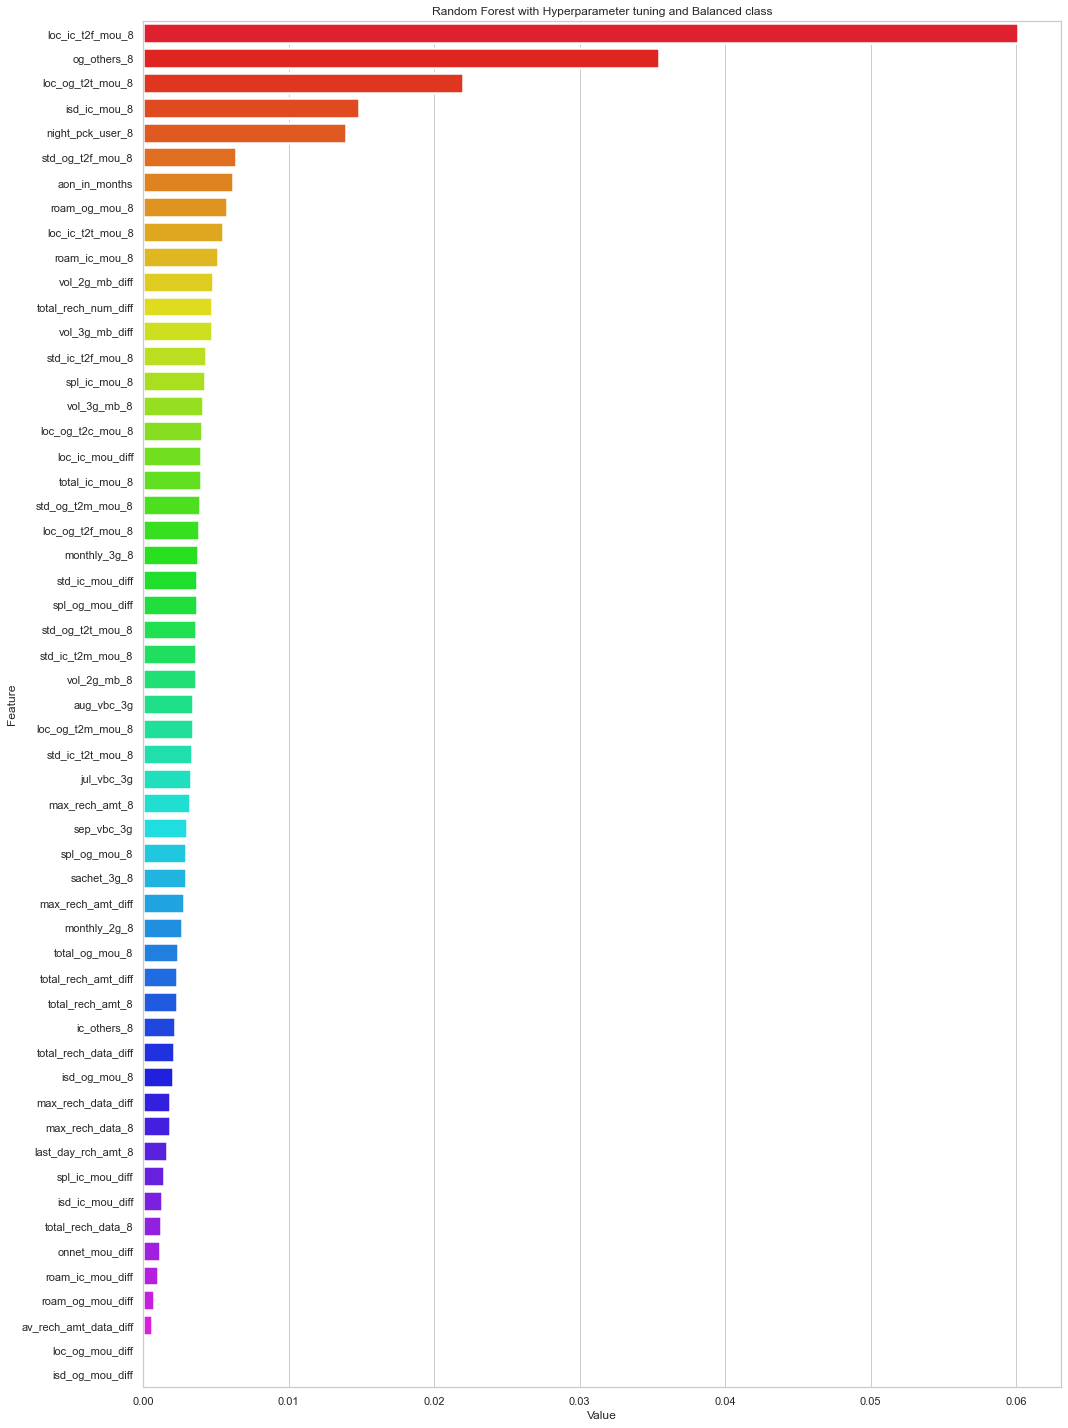

In [216]:
feature_imp = pd.DataFrame(sorted(zip(rf_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15,20))
# sns.color_palette("pastel")
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False),palette='gist_rainbow',linewidth=2.5)
plt.title('Random Forest with Hyperparameter tuning and Balanced class')
plt.tight_layout()
plt.show()


In [217]:
feature_imp=feature_imp.sort_values("Value",ascending = False)
feature_imp.head(20)

,Value,Feature
54,0.060089,loc_ic_t2f_mou_8
53,0.035434,og_others_8
52,0.021984,loc_og_t2t_mou_8
51,0.014811,isd_ic_mou_8
50,0.013972,night_pck_user_8
49,0.006368,std_og_t2f_mou_8
48,0.006179,aon_in_months
47,0.005808,roam_og_mou_8
46,0.005485,loc_ic_t2t_mou_8
45,0.005124,roam_ic_mou_8


## Conclusion

- We have seen from the above models that the accuracy values of the imbalance data are high
- The scores for the balanced data are reduced because 
- The top 5 features which we recommend are  as follows:
    - loc_ic_t2t_mou_8 (Local Incoming calls within same mobile operator in August)- 
    This feature is inversely proportional to churn rate i.e. if total outgoing calls decreases, churn rate increases. We recommend to provide cashbacks and discounts for the recharges done in this month. 
    We also recommend to provide cashbacks and discounts for the bigger plans before 10th of August. Customers wil get attracted seeing the offer which is valid for 3 months and will most likely not churn.
    - std_og_t2m_mou_8(Outgoing STD calls to other operator mobiles)-
    Company can reduce the charges on Out going STD calls to other operators to retain the customers from churning
    - std_og_t2t_mou_8(Outgoing STD calls to same operator mobiles)-
    Similarly, company can reduce the charges on Out going STD calls to same operator to retain the customers from churning
    - loc_og_t2t_mou_8(Local Outgoing calls within same mobile operator)-
    
    - loc_og_t2m_mou_8